In [19]:
from MicrobeRX.RuleGenerator import RuleGenerator

from pprint import pprint

from rdkit.Chem import AllChem

## Reaction Data

In [2]:
mnx_id="MNXR101011"
scheme = "1 MNXM1105732@MNXD1 + 1 MNXM741173@MNXD1 = 1 MNXM4026@MNXD1 + 1 WATER@MNXD1"

compounds_map={
    "MNXM1105732" : "C[C@H]([NH3+])C(=O)[O-]",
    "MNXM741173":"[NH3+][C@@H](CCC(=O)[O-])C(=O)[O-]",
    "MNXM4026":"C[C@H]([NH3+])C(=O)N[C@@H](CCC(=O)[O-])C(=O)[O-]",
    "WATER" : "[H]O[H]"
}

In [3]:
Reaction=RuleGenerator.PARSER(reaction=scheme,compounds_map=compounds_map)
Reaction.decompose_reaction()

print(Reaction.reaction, "\n")

reaction_dict=Reaction.reaction_dict
pprint(reaction_dict)

1 MNXM1105732 + 1 MNXM741173 = 1 MNXM4026 + 1 WATER 

{'LEFT': {'MNXM1105732': {'smiles': 'C[C@H]([NH3+])C(=O)[O-]',
                          'stoichiometry': 1.0},
          'MNXM741173': {'smiles': '[NH3+][C@@H](CCC(=O)[O-])C(=O)[O-]',
                         'stoichiometry': 1.0}},
 'RIGHT': {'MNXM4026': {'smiles': 'C[C@H]([NH3+])C(=O)N[C@@H](CCC(=O)[O-])C(=O)[O-]',
                        'stoichiometry': 1.0},
           'WATER': {'smiles': '[H]O[H]', 'stoichiometry': 1.0}},
 'ReactionNames': 'MNXM1105732.MNXM741173>>MNXM4026.WATER',
 'ReactionSmiles': 'C[C@H]([NH3+])C(=O)[O-].[NH3+][C@@H](CCC(=O)[O-])C(=O)[O-]>>C[C@H]([NH3+])C(=O)N[C@@H](CCC(=O)[O-])C(=O)[O-].[H]O[H]',
 'Reversible': True}


In [29]:
RXN=RuleGenerator.REACTION(reaction_smiles=reaction_dict['ReactionSmiles'],reaction_ids=reaction_dict['ReactionNames'],reversible=reaction_dict['Reversible'],mapper='RXNMapper')

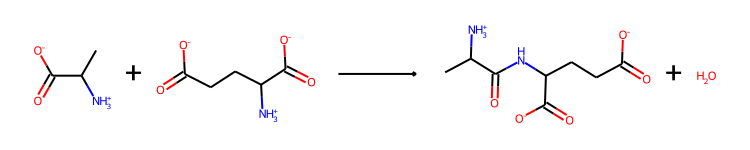

In [30]:
RXN.SanitizedReaction

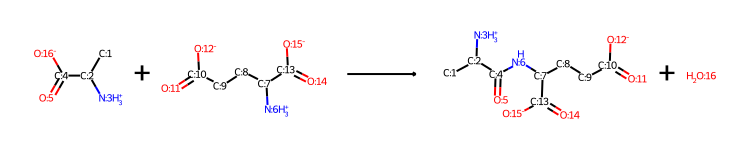

In [31]:
RXN.MappedReaction

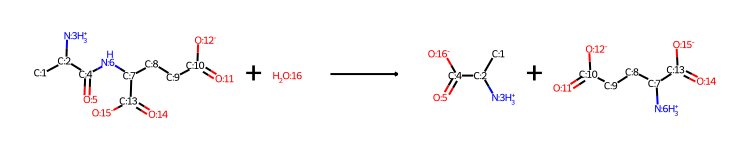

In [32]:
RXN.ReversedReaction

In [33]:
SRR=RuleGenerator.GenerateSingleReactantReactions(RXN.MappedReaction)
pprint(SRR)

{'reactantIdx_1': {'ID': 'MNXM1105732',
                   'SingleReactantReaction': <rdkit.Chem.rdChemReactions.ChemicalReaction object at 0x7fc32e1d2ab0>},
 'reactantIdx_2': {'ID': 'MNXM741173',
                   'SingleReactantReaction': <rdkit.Chem.rdChemReactions.ChemicalReaction object at 0x7fc3402d7fb0>}}


In [42]:
RULES=RuleGenerator.GenerateRules(SRR['reactantIdx_2']['SingleReactantReaction'])
pprint(RULES)

{'MNXM741173': {'ProductMap': '[CH3:1][CH:2]([NH3+:3])[C:4](=[O:5])[NH:6][CH:7]([CH2:8][CH2:9][C:10](=[O:11])[O-:12])[C:13](=[O:14])[O-:15]',
                'ProductName': 'MNXM4026',
                'ReactantMap': '[NH3+:6][CH:7]([CH2:8][CH2:9][C:10](=[O:11])[O-:12])[C:13](=[O:14])[O-:15]',
                'SingleReactantRules': {2: '[#7&+&!R:6]-[#6&!R:7]>>[#6&!R:1]-[#6&!R:2](-[#7&+&!R:3])-[#6&!R:4](=[#8&!R:5])-[#7&!R:6]-[#6&!R:7].[#8&!R:16]',
                                        4: '[#7&+&!R:6]-[#6&!R:7](-[#6&!R:8])-[#6&!R:13]>>[#6&!R:1]-[#6&!R:2](-[#7&+&!R:3])-[#6&!R:4](=[#8&!R:5])-[#7&!R:6]-[#6&!R:7](-[#6&!R:8])-[#6&!R:13].[#8&!R:16]',
                                        7: '[#7&+&!R:6]-[#6&!R:7](-[#6&!R:8]-[#6&!R:9])-[#6&!R:13](=[#8&!R:14])-[#8&-&!R:15]>>[#6&!R:1]-[#6&!R:2](-[#7&+&!R:3])-[#6&!R:4](=[#8&!R:5])-[#7&!R:6]-[#6&!R:7](-[#6&!R:8]-[#6&!R:9])-[#6&!R:13](=[#8&!R:14])-[#8&-&!R:15].[#8&!R:16]',
                                        8: '[#7&+&!R:6]-[#6&!R:7](-[#6&!R:

In [43]:
RULES["MNXM741173"]["SingleReactantRules"][4]

'[#7&+&!R:6]-[#6&!R:7](-[#6&!R:8])-[#6&!R:13]>>[#6&!R:1]-[#6&!R:2](-[#7&+&!R:3])-[#6&!R:4](=[#8&!R:5])-[#7&!R:6]-[#6&!R:7](-[#6&!R:8])-[#6&!R:13].[#8&!R:16]'

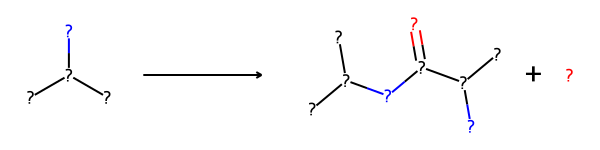

In [46]:
AllChem.ReactionFromSmarts(RULES["MNXM741173"]["SingleReactantRules"][4])

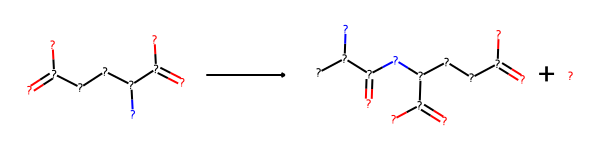

In [47]:
AllChem.ReactionFromSmarts(RULES["MNXM741173"]["SingleReactantRules"][10])